In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [61]:
# Reload CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("✅ Training data shape:", x_train.shape, y_train.shape)
print("✅ Testing data shape:", x_test.shape, y_test.shape)

✅ Training data shape: (50000, 32, 32, 3) (50000, 10)
✅ Testing data shape: (10000, 32, 32, 3) (10000, 10)


In [21]:
#data augmenttation piepelien

datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0,
    zoom_range=0.1)

datagen.fit(x_train)

In [67]:
#lets create the CNN model.
from tensorflow.keras import layers,models
model=models.Sequential ([
        layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(128,(3,3),activation='relu'),

        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax')

])

In [69]:
#model compiling and training
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
#training the model
history=model.fit(datagen.flow(x_train,y_train,batch_size=64),
                  validation_data=(x_test,y_test),
                  steps_per_epoch=len(x_train)//64,
                  epochs=25,
                  verbose=1)

Epoch 1/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.7354 - loss: 0.7651 - val_accuracy: 0.7351 - val_loss: 0.7807
Epoch 2/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7812 - loss: 0.6687 - val_accuracy: 0.7372 - val_loss: 0.7794
Epoch 3/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7386 - loss: 0.7416 - val_accuracy: 0.7399 - val_loss: 0.7736
Epoch 4/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6719 - loss: 0.8636 - val_accuracy: 0.7428 - val_loss: 0.7626
Epoch 5/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7410 - loss: 0.7382 - val_accuracy: 0.7424 - val_loss: 0.7733
Epoch 6/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7188 - loss: 0.7037 - val_accuracy: 0.7420 - val_loss: 0.7737
Epoch 7/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7448 - loss: 0.7210 - val_accuracy: 0.7316 - val_loss: 0.8106
Epoch 8/25
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6875 - loss: 0.8815 - val_accu

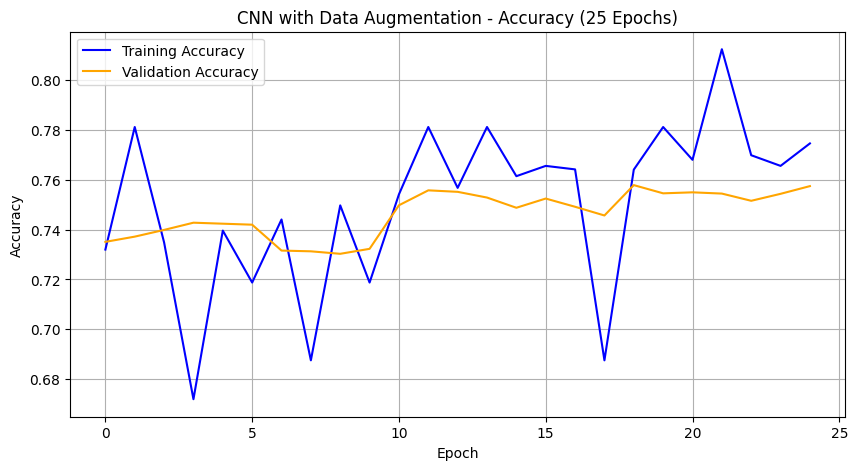

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('CNN with Data Augmentation - Accuracy (25 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()